<!-- Apenas treina, salva modelo/scaler e gera gráficos (sem MLflow) -->

In [21]:
# MVP Hello World: Coleta simples e modelo mínimo
# Setup de caminhos
project_root = Path('..').resolve()
sys.path.insert(0, str(project_root))

import sys
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.scripts.cache_manager import get_cache_manager, get_stock_data
from src.scripts.data_processor import StockDataProcessor


In [22]:
# Adicionar diretório raiz do projeto ao path
project_root = Path('..').resolve()
sys.path.insert(0, str(project_root))

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [23]:
# Célula 2: Testar cache manager
cache_manager = get_cache_manager()

# Informações do cache
cache_info = cache_manager.get_cache_info()
print("Informações do Cache:")
print(f"Diretório: {cache_info['cache_dir']}")
print(f"Total de arquivos: {cache_info['total_files']}")
print(f"Tamanho total: {cache_info['total_size_mb']:.2f} MB")

Informações do Cache:
Diretório: data/cache
Total de arquivos: 5
Tamanho total: 0.46 MB


In [24]:
symbol = 'AAPL'  # Ou 'PETR4.SA' para Petrobras
start_date = '2018-01-01'
end_date = '2025-12-31'

In [25]:
print(f"\nBaixando dados para {symbol}...")
df = get_stock_data(symbol, start_date, end_date)

print(f"\nDados obtidos:")
print(f"Período: {df.index[0].date()} a {df.index[-1].date()}")
print(f"Total de dias: {len(df)}")
print(f"Colunas: {df.columns.tolist()}")

2026-01-09 00:43:26,776 - src.scripts.cache_manager - INFO - Dados carregados do cache: AAPL



Baixando dados para AAPL...

Dados obtidos:
Período: 2018-01-02 a 2025-12-30
Total de dias: 2010
Colunas: ['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

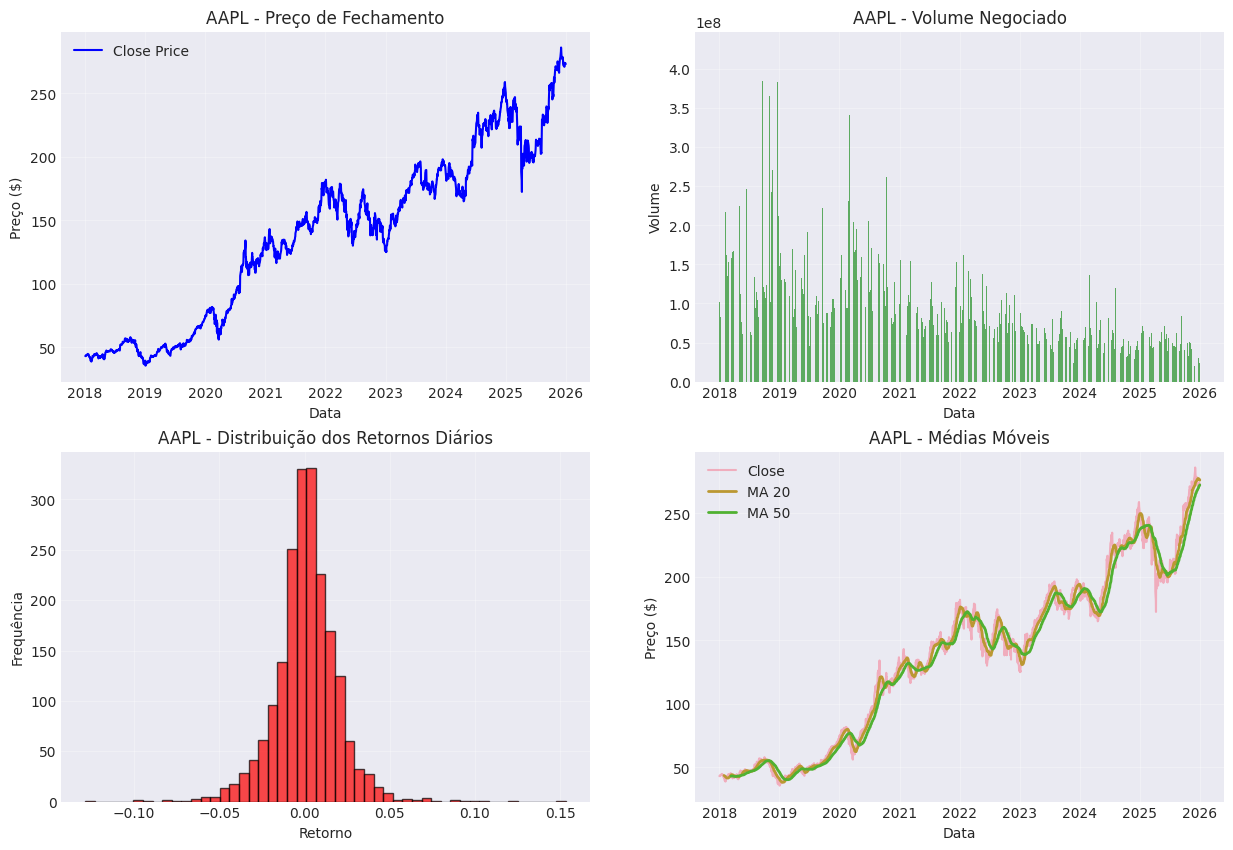

In [26]:
# Célula 4: Visualizar dados
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Preço de fechamento
axes[0, 0].plot(df.index, df['Close'], label='Close Price', color='blue')
axes[0, 0].set_title(f'{symbol} - Preço de Fechamento')
axes[0, 0].set_xlabel('Data')
axes[0, 0].set_ylabel('Preço ($)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Volume
axes[0, 1].bar(df.index, df['Volume'], alpha=0.6, color='green')
axes[0, 1].set_title(f'{symbol} - Volume Negociado')
axes[0, 1].set_xlabel('Data')
axes[0, 1].set_ylabel('Volume')
axes[0, 1].grid(True, alpha=0.3)

# Retornos diários
returns = df['Close'].pct_change().dropna()
axes[1, 0].hist(returns, bins=50, alpha=0.7, color='red', edgecolor='black')
axes[1, 0].set_title(f'{symbol} - Distribuição dos Retornos Diários')
axes[1, 0].set_xlabel('Retorno')
axes[1, 0].set_ylabel('Frequência')
axes[1, 0].grid(True, alpha=0.3)

# Média móvel
axes[1, 1].plot(df.index, df['Close'], label='Close', alpha=0.5)
axes[1, 1].plot(df.index, df['Close'].rolling(20).mean(), label='MA 20', linewidth=2)
axes[1, 1].plot(df.index, df['Close'].rolling(50).mean(), label='MA 50', linewidth=2)
axes[1, 1].set_title(f'{symbol} - Médias Móveis')
axes[1, 1].set_xlabel('Data')
axes[1, 1].set_ylabel('Preço ($)')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout

In [27]:
# Célula 5: Processar dados
print("\nProcessando dados para LSTM...")
processor = StockDataProcessor(symbol, start_date, end_date)
processed_df, lstm_data = processor.process_pipeline()


2026-01-09 00:43:28,431 - src.scripts.data_processor - INFO - StockDataProcessor inicializado para AAPL
2026-01-09 00:43:28,432 - src.scripts.data_processor - INFO - Carregando dados para AAPL
2026-01-09 00:43:28,436 - src.scripts.cache_manager - INFO - Dados carregados do cache: AAPL
2026-01-09 00:43:28,437 - src.scripts.data_processor - INFO - Preparando LSTM com 6 features
2026-01-09 00:43:28,437 - src.scripts.data_processor - INFO - Features: Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')
2026-01-09 00:43:28,442 - src.scripts.data_processor - INFO - 
✅ Dataset split:
2026-01-09 00:43:28,443 - src.scripts.data_processor - INFO -   Treino: 1386 sequências (70.0%)
2026-01-09 00:43:28,443 - src.scripts.data_processor - INFO -   Validação: 396 sequências (20.0%)
2026-01-09 00:43:28,443 - src.scripts.data_processor - INFO -   Teste: 198 sequências (10.0%)
2026-01-09 00:43:28,444 - src.scripts.data_processor - INFO -   Shape X_train: (1386, 30, 6) (samples,


Processando dados para LSTM...


In [28]:
print("Pré-processamento")
ohlcv  = df[['Open', 'High', 'Low', 'Close', 'Volume']]
processor = StockDataProcessor(symbol, start_date, end_date)
processed_df, lstm_data = processor.process_pipeline()

2026-01-09 00:43:28,453 - src.scripts.data_processor - INFO - StockDataProcessor inicializado para AAPL
2026-01-09 00:43:28,454 - src.scripts.data_processor - INFO - Carregando dados para AAPL
2026-01-09 00:43:28,458 - src.scripts.cache_manager - INFO - Dados carregados do cache: AAPL
2026-01-09 00:43:28,459 - src.scripts.data_processor - INFO - Preparando LSTM com 6 features
2026-01-09 00:43:28,459 - src.scripts.data_processor - INFO - Features: Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')
2026-01-09 00:43:28,464 - src.scripts.data_processor - INFO - 
✅ Dataset split:
2026-01-09 00:43:28,464 - src.scripts.data_processor - INFO -   Treino: 1386 sequências (70.0%)
2026-01-09 00:43:28,465 - src.scripts.data_processor - INFO -   Validação: 396 sequências (20.0%)
2026-01-09 00:43:28,465 - src.scripts.data_processor - INFO -   Teste: 198 sequências (10.0%)
2026-01-09 00:43:28,466 - src.scripts.data_processor - INFO -   Shape X_train: (1386, 30, 6) (samples,

Pré-processamento


In [29]:
X_train, y_train, X_val, y_val, X_test, y_test, scaler, feature_names = lstm_data

In [30]:
print(f"\nDados processados:")
print(f"DataFrame shape: {processed_df.shape}")
print(f"Features: {processed_df.columns.tolist()}")
print(f"Valores nulos: {processed_df.isnull().sum().sum()}")

print(f"\nDados LSTM:")
print(f"Treino: {X_train.shape}")
print(f"Validação: {X_val.shape}")
print(f"Teste: {X_test.shape}")
print(f"Features usadas: {feature_names}")


Dados processados:
DataFrame shape: (2010, 6)
Features: ['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']
Valores nulos: 0

Dados LSTM:
Treino: (1386, 30, 6)
Validação: (396, 30, 6)
Teste: (198, 30, 6)
Features usadas: Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')
